<a href="https://colab.research.google.com/github/lifeisbeautifu1/graduate-work/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import torch

In [112]:
torch.__version__

'2.0.1+cu118'

In [113]:
torch.cuda.is_available()

True

In [114]:
tensor = torch.tensor([1.0, 2.0, 3.0])

In [115]:
print(tensor, tensor.device)

tensor([1., 2., 3.]) cpu


In [116]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [117]:
tensor_on_gpu = tensor.to(device)

In [118]:
tensor_on_gpu

tensor([1., 2., 3.], device='cuda:0')

### PyTorch Workflow

In [119]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [120]:
torch.__version__

'2.0.1+cu118'

In [121]:
weight = 0.7
bias = 0.3

In [122]:
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [123]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [124]:
len(X), len(y)

(50, 50)

In [125]:
train_split = int(0.8 * len(X))
train_split

40

In [126]:
X_train, y_train = X[:train_split], y[:train_split]

In [127]:
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [245]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Training data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})



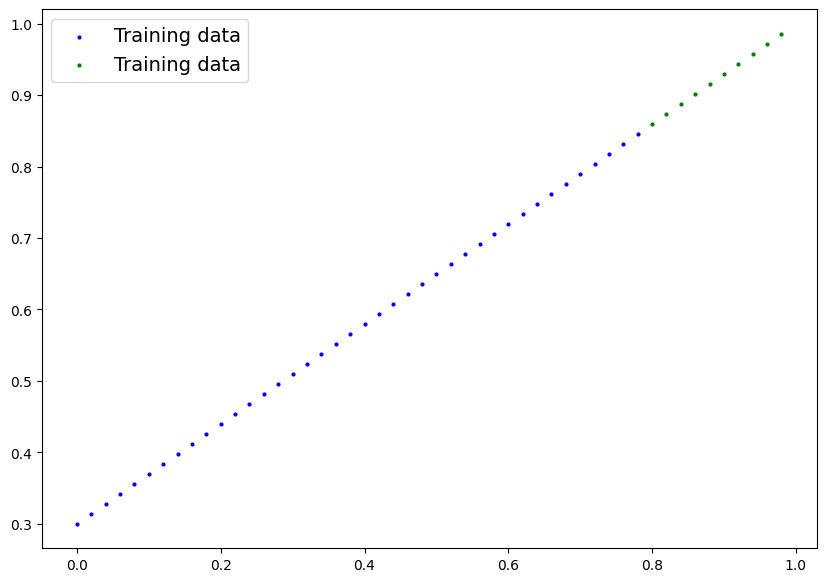

In [129]:
plot_predictions()

### First PyTorch model

In [130]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [131]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [132]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions

In [133]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

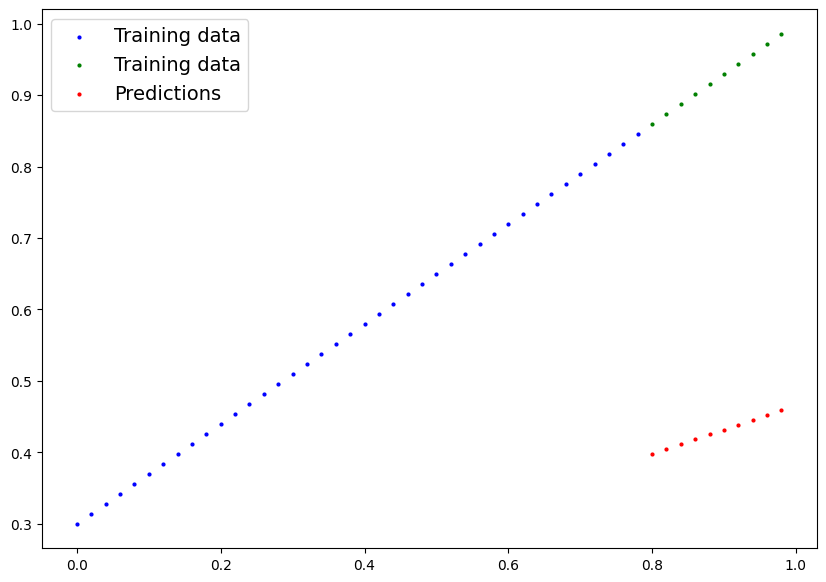

In [134]:
plot_predictions(predictions=y_preds)

### Lose functions
* L1 - MAE
* L2 - MSE

In [135]:
loss_fn = nn.L1Loss()

In [136]:
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [137]:
epoch_count = []
loss_values = []
test_loss_values = []

In [138]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)

    loss_values.append(loss)

    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} Test loss: {test_loss}")

    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch: 7

In [139]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [140]:
weight, bias

(0.7, 0.3)

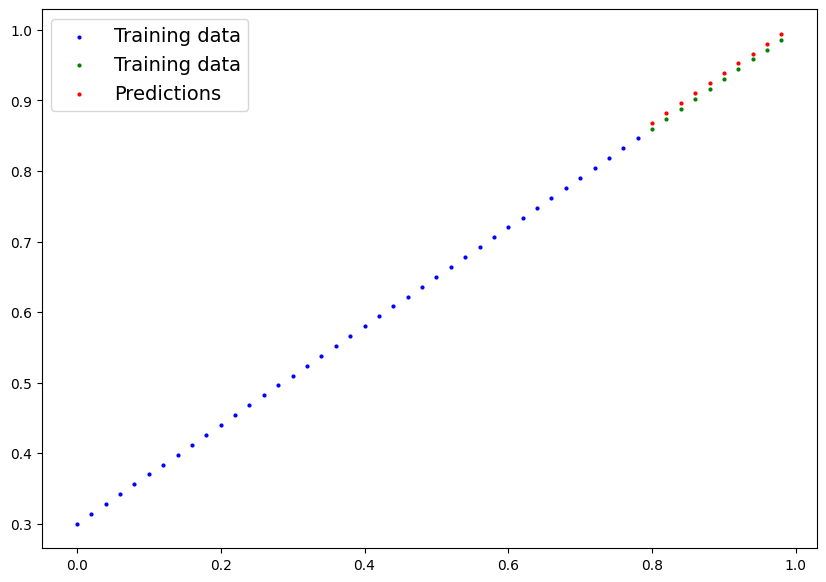

In [141]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

In [142]:
import numpy as np

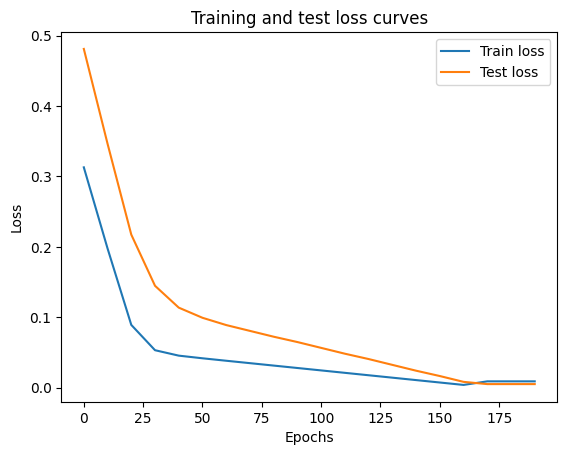

In [143]:
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

### Saving and loading models

In [147]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_model_0.pth')

In [149]:
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_model_0.pth


In [150]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1107 Aug 13 07:36 01_pytorch_model_0.pth


In [151]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [152]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [153]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [154]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

### Putting it all together

In [251]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

### Device agnostic code

In [252]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device {device}")

Using device cuda


### Data

In [253]:
weight = 0.7
bias = 0.1

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1000],
         [0.1140],
         [0.1280],
         [0.1420],
         [0.1560],
         [0.1700],
         [0.1840],
         [0.1980],
         [0.2120],
         [0.2260]]))

In [254]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [255]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Training data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

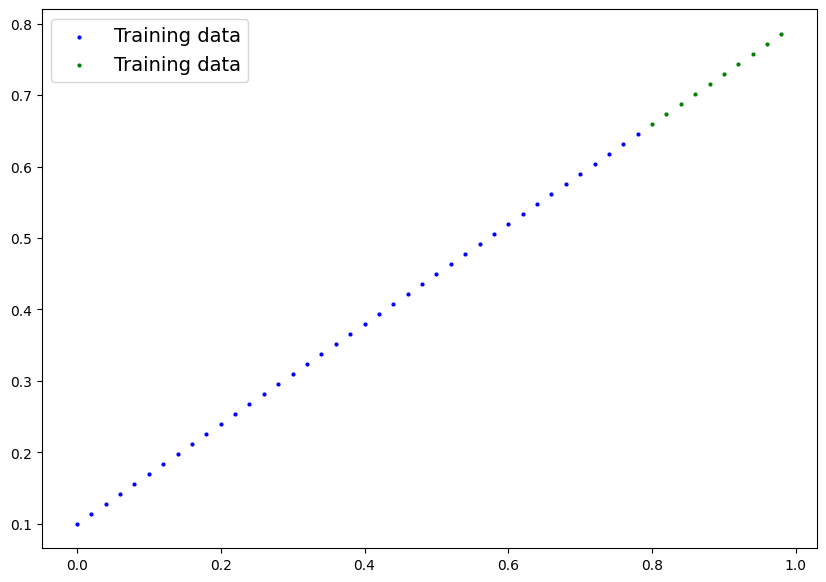

In [256]:
plot_predictions()

In [257]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [258]:
device

'cuda'

In [259]:
next(model_1.parameters()).device

device(type='cpu')

In [260]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training


In [261]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [262]:
torch.manual_seed(42)

epochs = 200

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.755177915096283 | Test loss: 0.7739762663841248
Epoch: 10 | Loss: 0.6399680972099304 | Test loss: 0.6392664313316345
Epoch: 20 | Loss: 0.5247582197189331 | Test loss: 0.5045565962791443
Epoch: 30 | Loss: 0.4095483422279358 | Test loss: 0.3698467016220093
Epoch: 40 | Loss: 0.2943384349346161 | Test loss: 0.23513689637184143
Epoch: 50 | Loss: 0.17912857234477997 | Test loss: 0.1004270538687706
Epoch: 60 | Loss: 0.06402724236249924 | Test loss: 0.03343571349978447
Epoch: 70 | Loss: 0.03615034744143486 | Test loss: 0.0744357779622078
Epoch: 80 | Loss: 0.0322178490459919 | Test loss: 0.07306785881519318
Epoch: 90 | Loss: 0.028742363676428795 | Test loss: 0.06616916507482529
Epoch: 100 | Loss: 0.02531111240386963 | Test loss: 0.058583587408065796
Epoch: 110 | Loss: 0.021877547726035118 | Test loss: 0.05031110718846321
Epoch: 120 | Loss: 0.018438737839460373 | Test loss: 0.04203861579298973
Epoch: 130 | Loss: 0.01500916387885809 | Test loss: 0.03445303440093994
Epoch: 140 |

In [263]:
len(y_train), len(X_train)

(40, 40)

In [264]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6919]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0995], device='cuda:0'))])

In [265]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.6531],
        [0.6669],
        [0.6807],
        [0.6946],
        [0.7084],
        [0.7223],
        [0.7361],
        [0.7499],
        [0.7638],
        [0.7776]], device='cuda:0')

In [266]:
y_test

tensor([[0.6600],
        [0.6740],
        [0.6880],
        [0.7020],
        [0.7160],
        [0.7300],
        [0.7440],
        [0.7580],
        [0.7720],
        [0.7860]], device='cuda:0')

In [267]:
y_test.cpu(), y_preds.cpu()

(tensor([[0.6600],
         [0.6740],
         [0.6880],
         [0.7020],
         [0.7160],
         [0.7300],
         [0.7440],
         [0.7580],
         [0.7720],
         [0.7860]]),
 tensor([[0.6531],
         [0.6669],
         [0.6807],
         [0.6946],
         [0.7084],
         [0.7223],
         [0.7361],
         [0.7499],
         [0.7638],
         [0.7776]]))

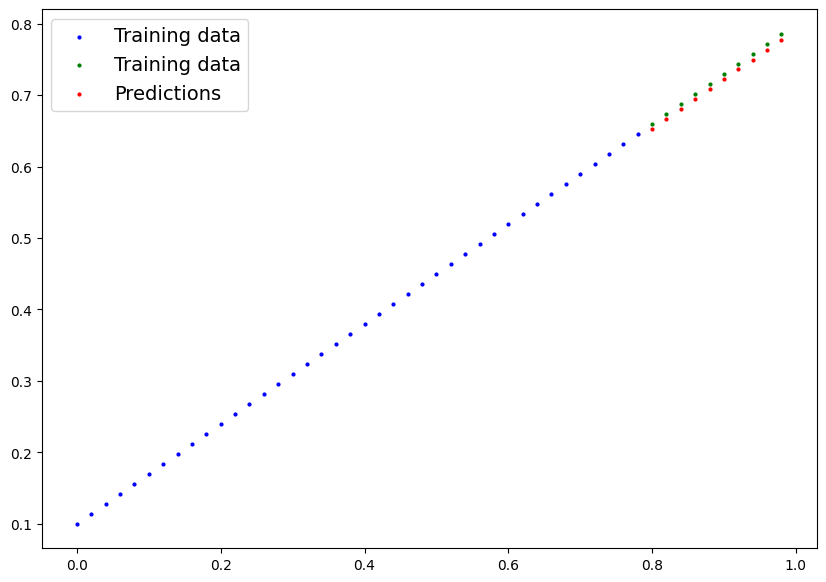

In [268]:
plot_predictions(predictions=y_preds.cpu())

In [271]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [272]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6919]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0995], device='cuda:0'))])

In [273]:
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')